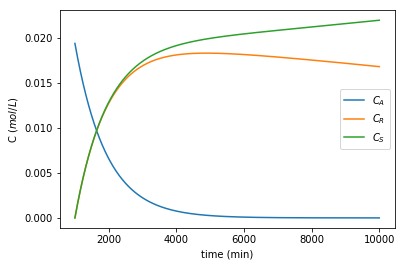

Comparing to Fogler

Ca: 0.000001
 Cr: 0.016795
 Cs: 0.021946


Maximum concentration is 0.0183 mol/dm3
It occurs at about 4888.4 +/- 1009.0 seconds


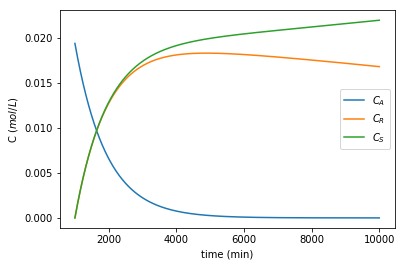

In [2]:
# ALWAYS START WITH THIS CODE...SUGGEST NOT TO CHANGE IT
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy
import scipy.integrate
import scipy.optimize

# These would be "initial conditions" for BR/semiBR, where time varies instead.
V0 = 2000 #L initial volume
P0 = 110 #kPa 8.314
Ca0 = P0 / (8.314 * 683) # M, initial concentration of A (only one in the reactor)

# Note only four species in this template...you'd need more or less depending on actual scenario.
# Ca0 = 0.375 # M, initial conc of A
Cr0 = 0 # M, initial concentration of R
Cs0 = 0 # M, init concentration of S

E1 = 42.6
E2 = 48.6
E3 = 32


# REALLY IMPORTANT!!!  First copy k's referenced to species.
# Then: Convert k's from species reference to reaction number reference by dividing by stoichiometric coefficient.
k1A = 0.00108 # L3/mol2/kgcat/min
k2R = 0.00119 # L5/mol4/kgcat/min
k3S = 0.00159

k1 = k1A/1
k2 = k2R/1
k3 = k3S/2


# NOTE:  adding this code just to illustrate use of exponential function np.exp and switching between reference and actual temp
Ea1 = 50 #kcal/mol
k1ref = k1
R_kcal = 0.00198720413 # kcal/mol/K
Tref = 410. + 273.15 #reference temperature in K--I've set this to be 410C like PS6Q4
T = 410 + 273.15 # actual temperature in K--for now, left it at 410C
k1_new = k1ref * np.exp(-1*Ea1/R_kcal * (1./T - 1./Tref)) #Arrhenius computation of rate constant k1 at new temp

def ref_switch(k_val, E_val, Tref, T):
    Ea1 = 50 #kcal/mol
    R_kcal = 0.00198720413 # kcal/mol/K
    Tref = Tref + 273.15 #reference temperature in K--I've set this to be 410C like PS6Q4
    T = T + 273.15 # actual temperature in K--for now, left it at 410C
    k_new = k_val * np.exp(-1*E_val/R_kcal * (1./T - 1./Tref)) #Arrhenius computation of rate constant k1 at new temp
    return k_new

k1_new = ref_switch(k1, E1, 410, 430)
k2_new = ref_switch(k2, E2, 410, 430)
k3_new = ref_switch(k3, E3, 410, 430)

# The function block that follows defines all the differential equation forms.
def dCvectordt(Cvector, time):
    """
    Differential equation for flows as a function of weight of catalyst
    """
    Ca, Cr, Cs = Cvector # unpack values from vector into four flows and the y variable for PFR

    # compute the rates of reactions
    r1 = k1 * Ca
    r2 = k2 * Cr
    r3 = k3 * Cs ** 2

    # compute the rates of generation of all species
    ra = -1 * r1 - 0 * r2
    rr = +1 * r1 - 1 * r3
    rs = +1 * r1 + 1 * r3
    
    # Express the differential equations for rates of change of flows....
    # note you'd have additional terms for semi-BR or membrane PFR representing in/out flows
    dCadt = ra
    dCrdt = rr
    dCsdt = rs

    return [dCadt, dCrdt, dCsdt] # pack up values into a vector.
    # "return" sends the info back to the ODE solver, many times

steps = np.linspace(1000, 10001, num=1001) # steps for ODE integration.  Here W begins at 0 and goes to 1000, with "num" steps.

Cvector0 = [Ca0, Cr0, Cs0] # initial values as specified way up above

Y_result = scipy.integrate.odeint(dCvectordt, Cvector0, steps) # BOOM!  the ODE integration happens here!
# Note:  errors from this statement generally due to some incompatibility, like the vectors not the same length.
new_Y_result = scipy.integrate.odeint(dCvectordt, Cvector0, steps) # New integration values based on
# new k value
# extract columns by transposing matrix and splitting into variables (the template has 4 flows and "y")
Ca, Cr, Cs = Y_result.T
new_Ca, new_Cr, new_Cs = new_Y_result.T # New Concentrations based on 430 C

# Do some plotting.  the plt.plot commands make the plots
plt.plot(steps, Ca, label='$C_A$')
plt.plot(steps, Cr, label='$C_R$')
plt.plot(steps, Cs, label='$C_S$')
# the next three lines format the plots with legend and axis labels.
plt.legend(loc="best")
plt.xlabel('time (min)')
plt.ylabel('C ($mol/L$)')
plt.show()  # this displays the plot

print("Comparing to Fogler\n")
print("Ca: %f\n" % Ca[1000],"Cr: %f\n" % Cr[1000],"Cs: %f\n" % Cs[1000]) #checking versus Fogler
print("")
# this is just some code to locate a maximum and print some info
# first define the function for any array we call concentrations
# so that we can re-use it later
def report_maxC(concentrations, timesteps):
    max_R = concentrations.max()
    print ("Maximum concentration is {0:.3g} mol/dm3".format(max_R))
    index = concentrations.argmax()
    max_time = timesteps[index]
    stepsize = timesteps[1]
    print ("It occurs at about {0:.1f} +/- {1:.1f} seconds".format(
                                                        max_time, stepsize))
# now call the function on the current Cc array
report_maxC(Cr, steps)  # for now we won't call that function!

# ***** New temp graph
# Do some plotting.  the plt.plot commands make the plots
plt.plot(steps, new_Ca, label='$C_A$')
plt.plot(steps, new_Cr, label='$C_R$')
plt.plot(steps, new_Cs, label='$C_S$')
# the next three lines format the plots with legend and axis labels.
plt.legend(loc="best")
plt.xlabel('time (min)')
plt.ylabel('C ($mol/L$)')
plt.show()  # this displays the plot